# 04.5 - LLMs integrated in data analytics and data visualization: PandaAI

https://github.com/sinaptik-ai/pandas-ai

## Combining a familiar framework with LLMs

LLM can help data visualization tasks in different ways:  
* They can read tables and help us understand the data by creating written summaries  
* They can translate our ideas of visualizations from english to code, accelerating the development process  


In [1]:
import pandasai as pai
import os

# Sample DataFrame
df = pai.DataFrame({
    "country": ["United States", "United Kingdom", "France", "Germany", "Italy", "Spain", "Canada", "Australia", "Japan", "China"],
    "revenue": [5000, 3200, 2900, 4100, 2300, 2100, 2500, 2600, 4500, 7000]
})

# By default, unless you choose a different LLM, it will use BambooLLM.
# You can get your free API key signing up at https://app.pandabi.ai (you can also configure it in your .env file)

pai.api_key.set(os.environ['PAI_API_KEY'])


In [4]:
df.head(10)

,country,revenue
0,United States,5000
1,United Kingdom,3200
2,France,2900
3,Germany,4100
4,Italy,2300
5,Spain,2100
6,Canada,2500
7,Australia,2600
8,Japan,4500
9,China,7000


In [5]:
# Let's talk with the data
df.chat('Which are the top 5 countries by sales?')

DataFrameResponse(type='dataframe', value=          country  revenue
0           China     7000
1   United States     5000
2           Japan     4500
3         Germany     4100
4  United Kingdom     3200)

ErrorResponse(type='error', value='Unfortunately, I was not able to get your answer. Please try again.')

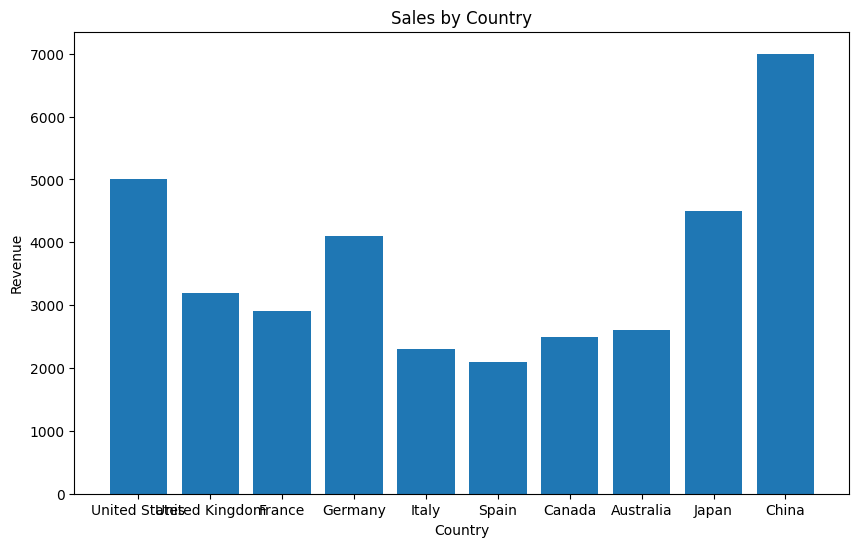

In [6]:

df.chat('Plot a bar chart with the sales by country')